##### We first load the data. The songs data set is a sample of 10 features of 400 songs with their respective genres.

In [98]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from plotnine import *

songs = pd.read_csv("songs.csv")
songs.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.244,0.982,8,-5.079,0.109,0.000005,0.905,0.0638,0.1960,189.746,death-metal
1,0.368,0.995,6,-4.894,0.183,0.000013,0.849,0.1590,0.1430,98.040,death-metal
2,0.227,0.981,6,-5.343,0.145,0.000006,0.840,0.0581,0.1240,115.207,death-metal
3,0.265,0.993,8,-4.949,0.173,0.000008,0.901,0.1300,0.0857,100.688,death-metal
4,0.348,0.998,2,-5.299,0.208,0.000006,0.897,0.1610,0.0391,109.997,death-metal


##### Because there are 10 different features of this data set, we are unable to visualize the genres across all of them at the same time. Instead, we have to do it 2 features at a time like this:

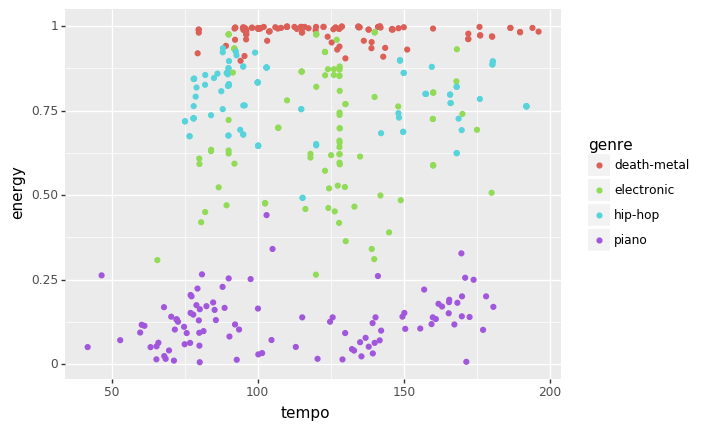

<ggplot: (162893875446)>

In [99]:
ggplot(songs,aes(x="tempo",y="energy",colour="genre"))+geom_point()

##### PCA allows us to reduce the feature space of the data. If our main issue is with plotting the data with all its features on a 2 dimensional plane, then we can use PCA to reduce the songs data frame to 2 principal component features only, and they plot genres across them to see what our data looks like.

##### We will first extract all the features (independent variables) in our data.

In [100]:
features=songs.iloc[:,0:10]
features

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.244,0.982,8,-5.079,0.1090,0.000005,0.9050,0.0638,0.1960,189.746
1,0.368,0.995,6,-4.894,0.1830,0.000013,0.8490,0.1590,0.1430,98.040
2,0.227,0.981,6,-5.343,0.1450,0.000006,0.8400,0.0581,0.1240,115.207
3,0.265,0.993,8,-4.949,0.1730,0.000008,0.9010,0.1300,0.0857,100.688
4,0.348,0.998,2,-5.299,0.2080,0.000006,0.8970,0.1610,0.0391,109.997
...,...,...,...,...,...,...,...,...,...,...
395,0.294,0.139,4,-18.174,0.0365,0.982000,0.8660,0.1200,0.1110,140.295
396,0.301,0.263,2,-13.932,0.0364,0.946000,0.0832,0.2060,0.1890,46.535
397,0.225,0.133,4,-17.643,0.0398,0.958000,0.8830,0.0986,0.1470,72.287
398,0.335,0.224,2,-14.953,0.0309,0.981000,0.8980,0.1110,0.4610,79.361


##### We will first have to prepare the data. We need to:

* scale all features to the same range and scale
* mean normalize all features so that they are on the origin

##### We will use the StandardScaler function in the sklearn-library to scale our features

In [101]:
from sklearn.preprocessing import StandardScaler
features = StandardScaler().fit_transform(features) # initialize function, then fit and transform features into scaled features

features


array([[-1.24385296,  0.98955803,  0.88784301, ..., -0.75868453,
        -0.66140594,  2.10637443],
       [-0.57457798,  1.02812448,  0.31734148, ..., -0.32885476,
        -0.88102856, -0.62536082],
       [-1.33560841,  0.98659138,  0.31734148, ..., -0.78442013,
        -0.95976119, -0.1139908 ],
       ...,
       [-1.34640316, -1.5291279 , -0.25316005, ..., -0.60156188,
        -0.86445327, -1.39249033],
       [-0.75269148, -1.25916274, -0.82366159, ..., -0.54557565,
         0.43670714, -1.18177025],
       [-0.6717308 , -1.31552909,  0.03209071, ..., -0.56363573,
        -0.73599475, -1.252189  ]])

##### Next, we will use the Normalizer function to normalize our features

In [102]:
from sklearn.preprocessing import Normalizer
features = Normalizer().fit_transform(features)

features


array([[-0.36638013,  0.29147689,  0.26151647, ..., -0.2234725 ,
        -0.19481884,  0.62043807],
       [-0.24788486,  0.44355423,  0.1369077 , ..., -0.14187477,
        -0.380094  , -0.26979364],
       [-0.51613005,  0.38125655,  0.12263285, ..., -0.30312987,
        -0.37088834, -0.0440504 ],
       ...,
       [-0.36631116, -0.41602444, -0.06887636, ..., -0.16366482,
        -0.23518875, -0.37884993],
       [-0.23284449, -0.38952096, -0.25479904, ..., -0.16877338,
         0.135095  , -0.36557966],
       [-0.20477814, -0.40104102,  0.0097829 , ..., -0.1718252 ,
        -0.22436911, -0.3817317 ]])

##### Now we can apply PCA on our features

In [103]:
from sklearn.decomposition import PCA # reduce 10 features into 2

pca = PCA(n_components=2) # specifying number to reduce to
principalComponents = pca.fit_transform(features) # fit and transform features into principalComponents

principalComponents

array([[ 0.16751244,  0.61632199],
       [ 0.03672842,  0.78567676],
       [ 0.21111597,  0.7671357 ],
       [ 0.17829515,  0.79838666],
       [ 0.10450008,  0.76958448],
       [ 0.24397418,  0.74655695],
       [ 0.06562217,  0.51449014],
       [ 0.21443368,  0.72360859],
       [ 0.07052718,  0.460132  ],
       [ 0.09632195,  0.65809043],
       [-0.01108885,  0.69504936],
       [ 0.10181171,  0.7420658 ],
       [ 0.162291  ,  0.61390122],
       [ 0.03151222,  0.84160145],
       [ 0.23736   ,  0.77750126],
       [ 0.13570834,  0.80037949],
       [ 0.07823273,  0.74283331],
       [ 0.24680879,  0.7443129 ],
       [ 0.06814636,  0.42031977],
       [ 0.21016991,  0.72763571],
       [ 0.07075701,  0.4621369 ],
       [ 0.08900789,  0.72426143],
       [ 0.01786502,  0.70602767],
       [ 0.11544298,  0.76520421],
       [-0.25387336,  0.68989626],
       [-0.10204115,  0.63304938],
       [-0.31490124,  0.47438884],
       [-0.27731254,  0.42780064],
       [-0.53485161,

##### principalComponents gives us the 2 principal components that explained the most variation in the data. We can attach them back to our songs data frame.

In [104]:
songs['PC1'] = principalComponents[:,0]
songs['PC2'] = principalComponents[:,1]

In [105]:
songs.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,PC1,PC2
0,0.244,0.982,8,-5.079,0.109,0.000005,0.905,0.0638,0.1960,189.746,death-metal,0.167512,0.616322
1,0.368,0.995,6,-4.894,0.183,0.000013,0.849,0.1590,0.1430,98.040,death-metal,0.036728,0.785677
2,0.227,0.981,6,-5.343,0.145,0.000006,0.840,0.0581,0.1240,115.207,death-metal,0.211116,0.767136
3,0.265,0.993,8,-4.949,0.173,0.000008,0.901,0.1300,0.0857,100.688,death-metal,0.178295,0.798387
4,0.348,0.998,2,-5.299,0.208,0.000006,0.897,0.1610,0.0391,109.997,death-metal,0.104500,0.769584


##### We can now visualize the spread of our genres based on these 2 components. Note that this is what our data looks like when we reduce it from 10 dimensional feature set to 2 dimensional. The 2 components are influenced by the original features, so our data has not changed, we have only transformed how we are looking at it.

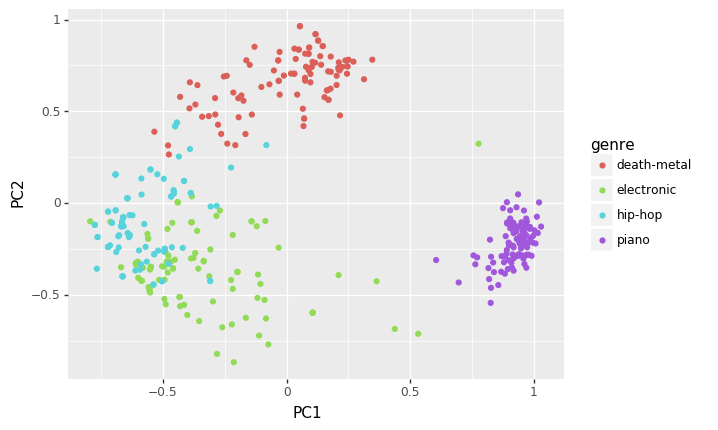

<ggplot: (162893910322)>

In [106]:
ggplot(songs,aes(x="PC1",y="PC2",colour="genre"))+geom_point()

##### We picked 2 components because we wanted to visualize a scatter plot for the data, but let's see how much variation is being explained by these 2 principal components.

In [107]:
pca.explained_variance_ratio_

array([0.35959115, 0.19047047])

##### The first features explains 35.9% variation in the data, while the second explains 19%. Combined, they explain 55% variation in our data, which isn't a good number from a feature selection standpoint.

##### If we wanted to instead reduce feature set using PCA to get x components that combined explain 95% of the variation in the data, then we will run the following code:

In [108]:
pca = PCA(0.95)
principalComponents = pca.fit_transform(features)

##### This will give us a reduced number of features that explain most variation in the data. These can be used in place of your original features for efficiency and speed purposes.

In [109]:
pca.explained_variance_ratio_

array([0.35959115, 0.19047047, 0.1231095 , 0.09721172, 0.08985334,
       0.0597711 , 0.03963698])

##### We see that it took 7 principal components to get to 95% variation of our data.


##### Let's see how well do our original 2 principal components will perform when predicting the genre using logistic regression.

##### We will first use our original 10 features to fit a logisitic regression model and show its accuracy. Next we will fit a logistic regression model using PC1 and PC2 and compare the accuracies.

In [110]:
songs.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,PC1,PC2
0,0.244,0.982,8,-5.079,0.109,0.000005,0.905,0.0638,0.1960,189.746,death-metal,0.167512,0.616322
1,0.368,0.995,6,-4.894,0.183,0.000013,0.849,0.1590,0.1430,98.040,death-metal,0.036728,0.785677
2,0.227,0.981,6,-5.343,0.145,0.000006,0.840,0.0581,0.1240,115.207,death-metal,0.211116,0.767136
3,0.265,0.993,8,-4.949,0.173,0.000008,0.901,0.1300,0.0857,100.688,death-metal,0.178295,0.798387
4,0.348,0.998,2,-5.299,0.208,0.000006,0.897,0.1610,0.0391,109.997,death-metal,0.104500,0.769584


##### We first need to encode our genres from string categories to numerical values.

In [111]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
songs['genre_cat'] = enc.fit_transform(songs['genre'])
songs.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,PC1,PC2,genre_cat
0,0.244,0.982,8,-5.079,0.109,0.000005,0.905,0.0638,0.1960,189.746,death-metal,0.167512,0.616322,0
1,0.368,0.995,6,-4.894,0.183,0.000013,0.849,0.1590,0.1430,98.040,death-metal,0.036728,0.785677,0
2,0.227,0.981,6,-5.343,0.145,0.000006,0.840,0.0581,0.1240,115.207,death-metal,0.211116,0.767136,0
3,0.265,0.993,8,-4.949,0.173,0.000008,0.901,0.1300,0.0857,100.688,death-metal,0.178295,0.798387,0
4,0.348,0.998,2,-5.299,0.208,0.000006,0.897,0.1610,0.0391,109.997,death-metal,0.104500,0.769584,0


##### Grabbing the first 10 columns of songs, which are our 10 song features, and also the column at index 13 which is the encoded version of genre.

In [115]:
X = songs.iloc[:,0:10]
y = songs.iloc[:,13]

##### Next we load relative functions

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


##### We now initialize logistic regression model, fit it with our 10 features and view the accuracy of its classification. We will do this for 100 iterations to get a proper accuracy score.

In [118]:
score = []
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    score.append(accuracy_score(y_test,predictions))

sum(score)/len(score)

0.8956250000000003

##### We get 89.56% accuracy in predicting the genre label for our data using 10 song features. Let's try it now with PC1 and PC2.

In [120]:
X = songs.iloc[:,11:13]
y = songs.iloc[:,13]

In [122]:
score = []
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    score.append(accuracy_score(y_test,predictions))

sum(score)/len(score)

0.8768749999999996

##### We get 87.68% accuracy in predicting the genre label for our data using just 2 principal components. What will be the accuracy score if we use the first k principal components that explain 90% variation in the data?

##### We will start by initializing a PCA model on our features to get all components that explain 90% of the variation in the data

In [130]:
pca = PCA(0.90)
principalComponents = pca.fit_transform(features)
pca.explained_variance_ratio_

array([0.35959115, 0.19047047, 0.1231095 , 0.09721172, 0.08985334,
       0.0597711 ])

##### We get 6 Principal components, that we can now attach back to original data. I will use the principalComponents instead of X here because it already contains all 6 components that I need as independent variables for this model.

In [131]:
score = []
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(principalComponents,y,test_size=0.2)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    score.append(accuracy_score(y_test,predictions))

sum(score)/len(score)

0.95575

##### We get a 95.57% accuracy after running the model for 100 iterations. So we have considerably increased our prediction score and have used 4 less features than the original data set.